<a href="https://colab.research.google.com/github/awhooshingwind/Math254/blob/main/jpierson_wp1_suppl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **_NOTE_**: This started as a Matlab script to verify my solutions (took ENGR 240 last quarter and loved it!) and generate a graph plotting the two calculations (m=22 and m=28), then it turned into, well, something a little more.  
>
> In Math 220 (and I think Math 152) a certain wise professor suggested getting some programming experience. This seemed like good advice, so here we are. This is my first go at a Google Colab notebook, still learning Markdown and how to effectively format these - any advice or feedback will be much appreciated.
***

## Cobb-Douglas Production function ##

Given $P = bL^\alpha K^{1-\alpha}$, subject to the constraint: $mL + nK = p$ the maximum value for production is obtained when:

$$K = \frac{p(1-\alpha)}{n} \  \text{and}  \ L = \frac{\alpha p}{m} $$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

This report will explore simple economic modeling using the Cobb-Douglas production function, $P = bL^\alpha K^{1-\alpha}$, where $P$ is total value of annual production, $L$ is the labor input, $K$ is the input of capital, and $b$, $\alpha$ are determined constants relating to productivity and output elasticity, respectively.
  
First formulated around the 1920s, this function relates the potential production output based on two or more inputs. In this case, the function will be used to model the value of total annual production based on the investments in labor and capital for the given year.  
    
Output is limited by the annual expenditure on capital and labor. By applying this constraint to the Cobb-Douglas function, the resulting model can offer insight into the optimal allocation of that budget, maximizing annual production.

This constraint can be represented by $mL + nK = p$ where: $m$ is the cost of one unit of labor, $n$ is the unit cost of capital, and $p$ is the total budget.

Solving this constrained optimization problem symbolically, first, will make a flexible model that can determine maximum production levels over various input parameters. The ability to forecast several economic scenarios gives this simple model more powerful predictive insight.  
***

# Symbolic Derivation of K and L (Lagrange Multipliers) #

$$\nabla P = \lambda \nabla g$$


$$P_L = \lambda \ g_L \ →  \ \alpha b L^{\alpha -1} K^{1-\alpha} \ = \ \lambda (m) \  → \  \lambda = \  \frac{\alpha b L^{\alpha -1} K^
{1-\alpha}}{m}$$



$$P_K = \lambda g_K  \ → \  (1 -\alpha) \ b L^{\alpha} K^{-\alpha} \ = \ \lambda (n) \  →  \ \lambda = \frac{(1 -\alpha) b L^{\alpha} K^{-\alpha}}{n}$$  

Equate λ and cross multiply:  

$$ \frac{\alpha b L^{\alpha -1} K^{1-\alpha}}{m} \  = \ \frac{(1 -\alpha) \ b L^{\alpha} K^{-\alpha}}{n} \ \\ $$  
$$ n \ \alpha b L^{\alpha -1} K^{1-\alpha} \ = \ m \ (1 -\alpha) \ b L^{\alpha} K^{-\alpha} \ \\ $$  

Simply (divide by $ b L^{\alpha} K^{-\alpha}$):  
  
$$ \frac{n \alpha K}{L} \ = \ m \ (1 - \alpha) $$
  

Solve for n:  

$$ n \ = \frac{m \ (1 - \alpha) L}{\alpha K} $$  
  
Substitute into constraint equation:
$$ mL + \frac{m \ (1 - \alpha) L}{\alpha K} K = p $$  

Distribute, cancel, and solve for L:  

$$ L = \frac{\alpha p}{m} $$

Repeat above steps, solving $\frac{n \alpha K}{L} \ = \ m \ (1 - \alpha) $ for m:
  
  $$ m = \frac{ n \alpha K}{(1-\alpha)L} $$

  Substitute into constraint equation:  
  $$ \frac{ n \alpha K}{(1-\alpha)L} L + nK = p$$  

  Distribute, cancel, and solve for K:  
  $$ (p - nK)(1 - \alpha) = n \alpha K $$  

  $$K = \frac{ p (1-\alpha)}{n} $$

## Solutions with given parameters: ##
First, let us apply some arbitrary but reasonable constants to the production function to consider the impact of raising the unit cost of labor. Assuming values of $\frac{1}{4}$ for $\alpha$ and 100 for b, given a budget of \$850,000, a unit cost for capital of \$34 and initial unit cost for labor of \$22.
***



In [ ]:
# Assume:
a = 1/4;
b = 100;
n = 34;
m = [22, 28]
p = 850000;

# def functions
def P_func(L, K):
  return b*L**a *K**(1-a);

def K_func(n):
  return p*(1-a)/n;

K = K_func(n); # set K value

def L_func(m):
  return a*p/m;

# calc solutions
L1 = L_func(m[0]);
L2 = L_func(m[1]);
max1 = P_func(L1,K);
max2 = P_func(L2, K);

percent_change = (max1-max2)/max1
abs_change = max1-max2

# output results
out = f'Max P (m = ${m[0]}): ${max1:,.2f}\nMax P (m = ${m[1]}): ${max2:,.2f}\n\nPercent Change: {percent_change:.2%}\nAbsolute Change: ${abs_change:,.2f}'
print(out)

Max P (m = $22): $1,588,491.95
Max P (m = $28): $1,495,550.84

Percent Change: 5.85%
Absolute Change: $92,941.11


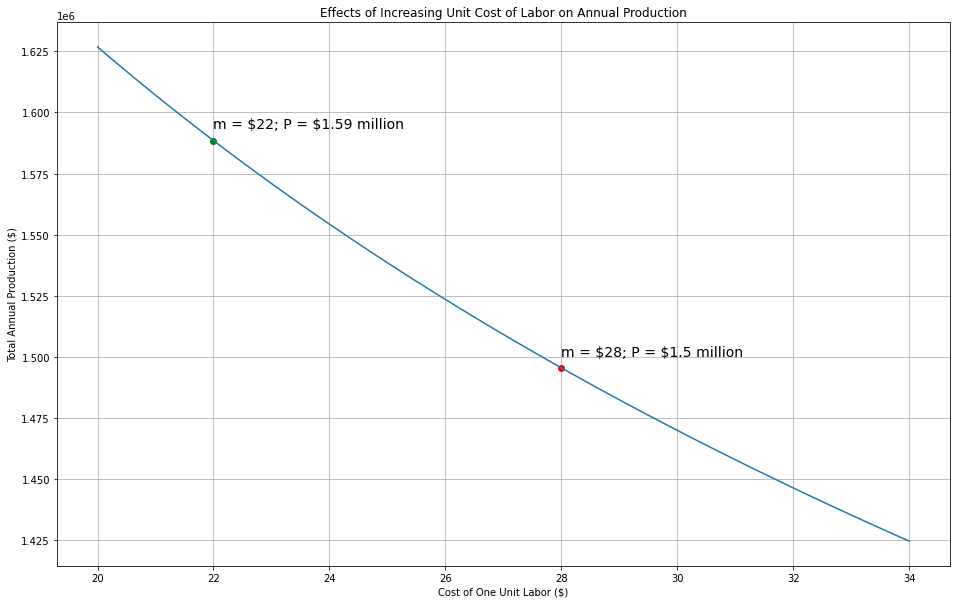

In [ ]:
# plot

# set interval
start = 20
stop = 34
step = 0.25
# generate values for plot
mvals = np.arange(start, stop+step, step)
Lplot = L_func(mvals)
Pplot = P_func(Lplot, K)
# create graph w/ labels
plt.figure(figsize=(16, 10))
plt.plot(m[0], max1, 'go', m[1], max2, 'ro')
plt.plot(mvals, Pplot, '-')
plt.grid(True)
plt.title("Effects of Increasing Unit Cost of Labor on Annual Production")
plt.xlabel('Cost of One Unit Labor ($)')
plt.ylabel('Total Annual Production ($)')
plt.tight_layout
note = lambda m, P: f'm = \${m}; P = \${P:.3g} million'
plt.annotate(note(m[0], max1/1e6),xy=(22,max1+5000),fontsize=14)
plt.annotate(note(m[1], max2/1e6),xy=(28,max2+5000),fontsize=14)
plt.show;


Given the above parameters, our initial annual production is about \$1.59 million. However, with the increase in cost of each unit labor to $28, that level drops almost 5.85%, or nearly \$93,000 annually. As shown by the graph, production and unit cost of labor are inversely proportional. 


Playground notes:

I was curious how the system would respond to different values for the $\alpha$ and b parameters, so the following is an exploration of that using some level curves and contour maps

In [ ]:
# Playground

# different version of Cobb-Douglas (accepts all variables as parameters)
def cobb_doug(b,L, a, K):
  return b*L**a *K**(1-a);

# parameters for testing
m_test = 28
n_test = 32
b_test = 105
L_test = L_func(m_test)
a_test = 1/4
K_test = K_func(n_test) 

# output
max_test = cobb_doug(b_test, L_test, a_test, K_test)
test_out = f'Max P: ${max_test:,.2f}'
print(test_out)


Max P: $1,643,376.92


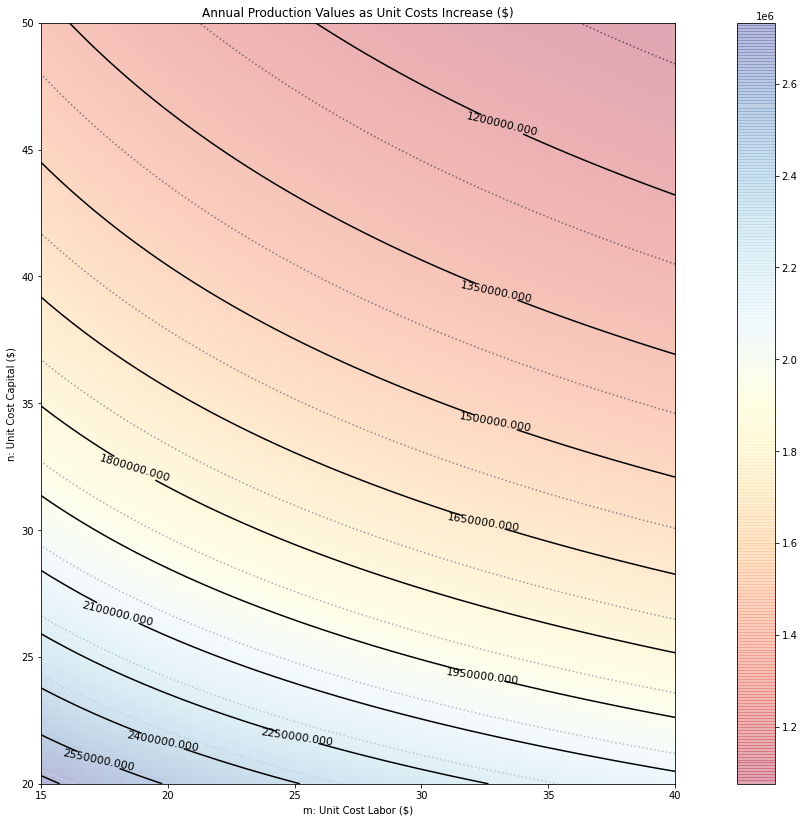

In [ ]:
# Playground Pt 2 (level map)

# Let x represent m and y represent n
# Parameters (adjusting ranges/sample size for costs m and n)
x_min = 15
x_max = 40
y_min = 20
y_max = 50
sample = 100

# Generate Level map
x = np.linspace(x_min, x_max, sample)
y = np.linspace(y_min, y_max, sample)
X, Y = np.meshgrid(x, y)

L_level = L_func(X)
K_level = K_func(Y)

# Let Z represent P
# adjusted values
Z = cobb_doug(b_test, L_level, a_test, K_level)
Z = np.array(Z)
# original parameter values for comparison
Z0 = cobb_doug(b, L_level, a, K_level)
Z0 = np.array(Z0)

# Plots w/ labels
plt.figure(figsize = (22,14))
contours = plt.contour(X, Y, Z, 14, colors='black')
plt.clabel(contours, inline=True, fontsize=11)
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], origin='lower',
           cmap='RdYlBu', alpha=0.35)
plt.xlabel('m: Unit Cost Labor ($)')
plt.ylabel('n: Unit Cost Capital ($)')
plt.title('Annual Production Values as Unit Costs Increase ($)')
plt.colorbar();

# overlay unadjusted levels using given a and b parameters (dotted)
plt.contour(X, Y, Z0, 14,cmap="bone", linestyles='dotted', alpha=0.6)
plt.show()

I may have gone a bit overboard with this notebook, but it was a valuable experience trying to craft a report like this leveraging some programming for calculations and illustrative purposes.  

I feel like there could be a better way to format the whole thing, either as it's own standalone exploration or as a linked supplemental resource to the written word document. As it stands, it's somewhere in between...but I've spent the last week working on this and need to get started on Module 2...

I'll probably try a similar approach with the other writing projects for practice, but hopefully won't have to spend quite as much time reading through matplotlib documentation!